In [1]:
import torch
from torchvision import transforms as t
from PIL import Image
import matplotlib.pyplot as plt
from model.model import ENet
import numpy as np

MODEL_PATH = 'model_best.pth'

def display_image(img, size=(8, 8)):
    plt.figure(figsize=size)
    plt.imshow(img)
    plt.xticks([])
    plt.yticks([])
    plt.show()

In [2]:
# Use eval to enable prediction mode for the model
# Model can only run on Cuda
device = torch.device('cuda') 

model = ENet(num_classes=1)
state = torch.load(MODEL_PATH)['state_dict']
model.load_state_dict(state)

model = model.to(device).eval()

In [3]:
original_filename = 'demo.jpeg'
image = Image.open(original_filename)
image = np.array(image)

print("Image shape:", image.shape)

Image shape: (256, 256, 3)


In [9]:
transform_pipeline = t.Compose([
    t.ToTensor(),
    t.Normalize(
        mean=[0.485, 0.456, 0.406],
        std=[0.229, 0.224, 0.225],
    )
])

transformed_image = transform_pipeline(image)
transformed_image = torch.unsqueeze(transformed_image, dim=0)
transformed_image = transformed_image.to(device)

print("Transformed image shape:", transformed_image.shape)
out = model(transformed_image)

Transformed image shape: torch.Size([1, 3, 256, 256])


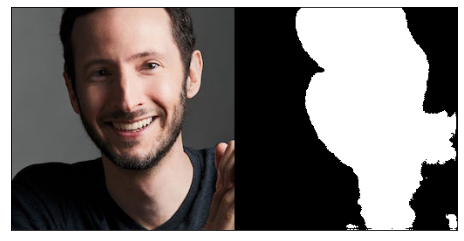

In [10]:
# Extract masks

# Check which pixels have probability > 0.5
mask = torch.sigmoid(out.squeeze()) > 0.5

# Convert to numpy
mask = mask.to(torch.uint8).cpu().numpy() * 255
mask = np.stack([mask, mask, mask], axis=2)

combined = np.concatenate([image, mask], axis=1)

display_image(combined)